## CANDISC - oliveoil dataset

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")

### oliveoil dataset

In [2]:
#vins dataset
from discrimintools.datasets import load_oliveoil
D = load_oliveoil()
print(D.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CLASSE       569 non-null    object
 1   palmitic     569 non-null    int64 
 2   palmitoleic  569 non-null    int64 
 3   stearic      569 non-null    int64 
 4   oleic        569 non-null    int64 
 5   linoleic     569 non-null    int64 
 6   linolenic    569 non-null    int64 
 7   arachidic    569 non-null    int64 
 8   eicosenoic   569 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 40.1+ KB
None


In [3]:
#split into X and y
y, X = D["CLASSE"], D.drop(columns=["CLASSE"])

### instanciation and training

In [4]:
from discrimintools import CANDISC
clf = CANDISC(n_components=2)
clf.fit(X,y)

,n_components,2
,classes,None
,warn_message,True


#### `eval_predict` function

In [5]:
#eval_predict function
eval_train = clf.eval_predict(X,y,verbose=True)

Observation Profile:
                        Read  Used
Number of Observations   569   569

Number of Observations Classified into CLASSE:
prediction    Centre_North  Sardinia  South  Total
CLASSE                                            
Centre_North           146         4      0    150
Sardinia                 0        97      0     97
South                    1         0    321    322
Total                  147       101    321    569

Percent Classified into CLASSE:
prediction    Centre_North    Sardinia      South  Total
CLASSE                                                  
Centre_North     97.333333    2.666667   0.000000  100.0
Sardinia          0.000000  100.000000   0.000000  100.0
South             0.310559    0.000000  99.689441  100.0
Total            25.834798   17.750439  56.414763  100.0
Priors            0.263620    0.170475   0.565905    NaN

Error Count Estimates for CLASSE:
        Centre_North  Sardinia     South     Total
Rate        0.026667  0.000000  0.003

#### `score` function

In [6]:
#score function
print("Accuracy : {}%".format(100*round(clf.score(X,y),2)))

Accuracy : 99.0%


In [7]:
#error rate
print("Error rate : {}%".format(100-100*round(clf.score(X,y),2)))

Error rate : 1.0%


### `summary`

In [8]:
from discrimintools import summaryCANDISC

#### Simple summary

In [9]:
#simple summary
summaryCANDISC(clf)

                     Canonical Discriminant Analysis - Results                     

Summary Information:
               infos  Value                  DF  DF value
0  Total Sample Size    569            DF Total       568
1          Variables      8   DF Within Classes       566
2            Classes      3  DF Between Classes         2

Class Level Information:
              Frequency  Proportion  Prior Probability
Centre_North        150      0.2636             0.2636
Sardinia             97      0.1705             0.1705
South               322      0.5659             0.5659

Total-Sample Class Means:
             Centre_North   Sardinia      South
palmitic        1094.8333  1112.0619  1332.3696
palmitoleic       83.8933    96.3505   154.8882
stearic          231.0400   226.3505   228.7081
oleic           7791.9733  7266.9072  7099.5311
linoleic         727.8800  1197.3608  1034.0093
linolenic         21.7467    27.0103    38.0373
arachidic         37.5467    73.0000    63.1025
eicos

#### Detailed summary

In [10]:
#detailed summary
summaryCANDISC(clf,detailed=True)

                     Canonical Discriminant Analysis - Results                     

Summary Information:
               infos  Value                  DF  DF value
0  Total Sample Size    569            DF Total       568
1          Variables      8   DF Within Classes       566
2            Classes      3  DF Between Classes         2

Class Level Information:
              Frequency  Proportion  Prior Probability
Centre_North        150      0.2636             0.2636
Sardinia             97      0.1705             0.1705
South               322      0.5659             0.5659

Total-Sample Class Means:
             Centre_North   Sardinia      South
palmitic        1094.8333  1112.0619  1332.3696
palmitoleic       83.8933    96.3505   154.8882
stearic          231.0400   226.3505   228.7081
oleic           7791.9733  7266.9072  7099.5311
linoleic         727.8800  1197.3608  1034.0093
linolenic         21.7467    27.0103    38.0373
arachidic         37.5467    73.0000    63.1025
eicos

### Evaluation of prediction on testing dataset

#### Testing data

In [11]:
#testining data
DTest = load_oliveoil("test")
print(DTest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CLASSE       3 non-null      object
 1   palmitic     3 non-null      int64 
 2   palmitoleic  3 non-null      int64 
 3   stearic      3 non-null      int64 
 4   oleic        3 non-null      int64 
 5   linoleic     3 non-null      int64 
 6   linolenic    3 non-null      int64 
 7   arachidic    3 non-null      int64 
 8   eicosenoic   3 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 344.0+ bytes
None


In [12]:
#display
print(DTest)

         CLASSE  palmitic  palmitoleic  stearic  oleic  linoleic  linolenic  \
0      Sardinia      1042          135      210   7376      1116         35   
1  Centre_North      1090           60      195   7955       600         28   
2         South      1306          127      250   7254       869         47   

   arachidic  eicosenoic  
0         90           3  
1         42           2  
2         68          24  


In [13]:
#display into X and y
yTest, XTest = DTest["CLASSE"], DTest.drop(columns=["CLASSE"])
#eval_predict function
eval_test = clf.eval_predict(XTest,yTest,verbose=True)

Observation Profile:
                        Read  Used
Number of Observations     3     3

Number of Observations Classified into CLASSE:
prediction    Centre_North  Sardinia  South  Total
CLASSE                                            
Centre_North             1         0      0      1
Sardinia                 0         1      0      1
South                    0         0      1      1
Total                    1         1      1      3

Percent Classified into CLASSE:
prediction    Centre_North    Sardinia       South  Total
CLASSE                                                   
Centre_North    100.000000    0.000000    0.000000  100.0
Sardinia          0.000000  100.000000    0.000000  100.0
South             0.000000    0.000000  100.000000  100.0
Total            33.333333   33.333333   33.333333  100.0
Priors            0.263620    0.170475    0.565905    NaN

Error Count Estimates for CLASSE:
        Centre_North  Sardinia     South  Total
Rate         0.00000  0.000000  0

### Plotting functions

In [14]:
#plotting
from discrimintools import fviz_candisc

#### Graph of individuals

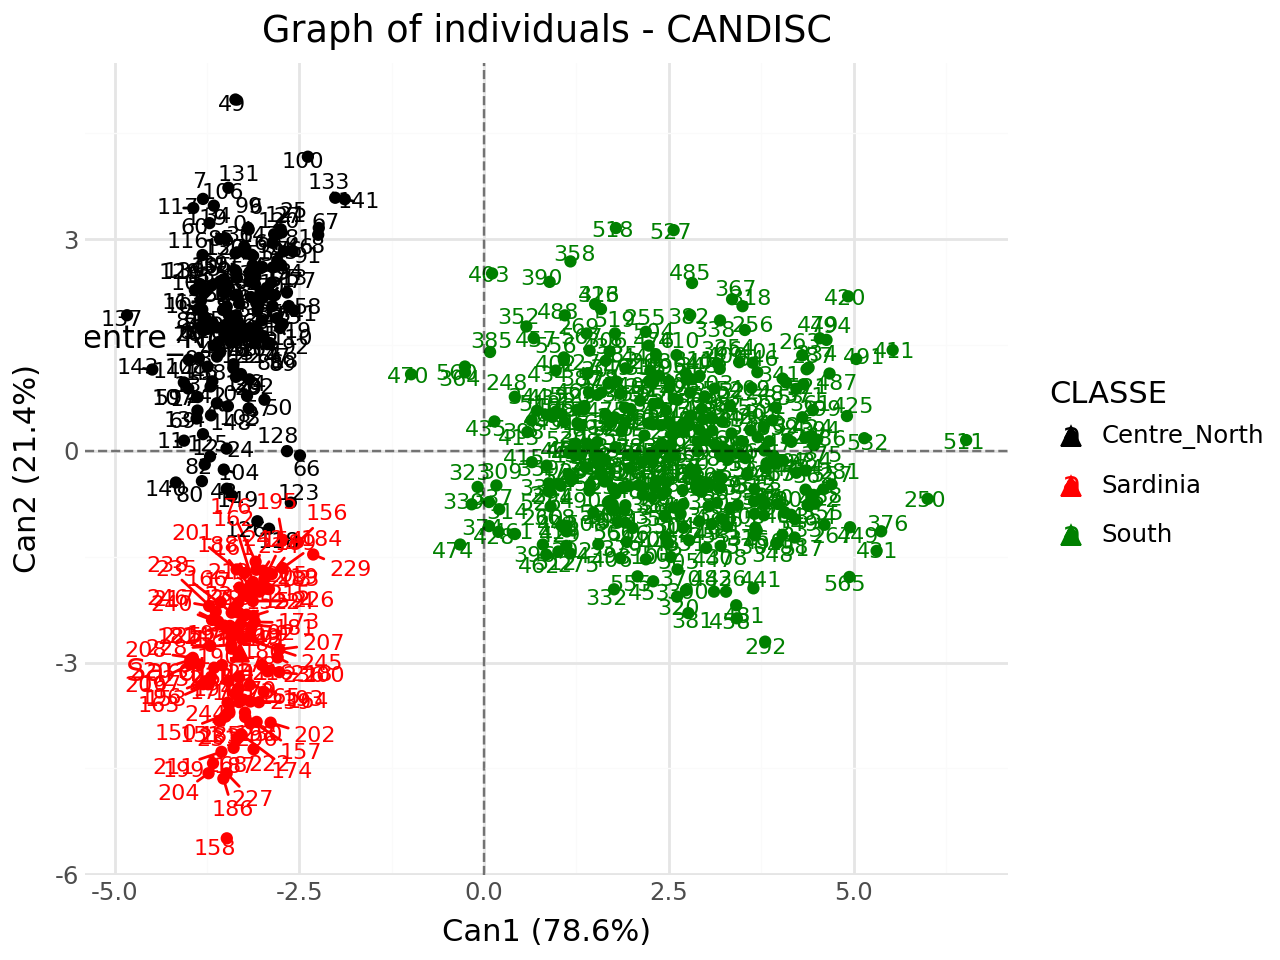

In [15]:
#graph of individuals
p = fviz_candisc(clf,element="ind",repel=True)
p.show()

We add supplementary individuals to initial plot.

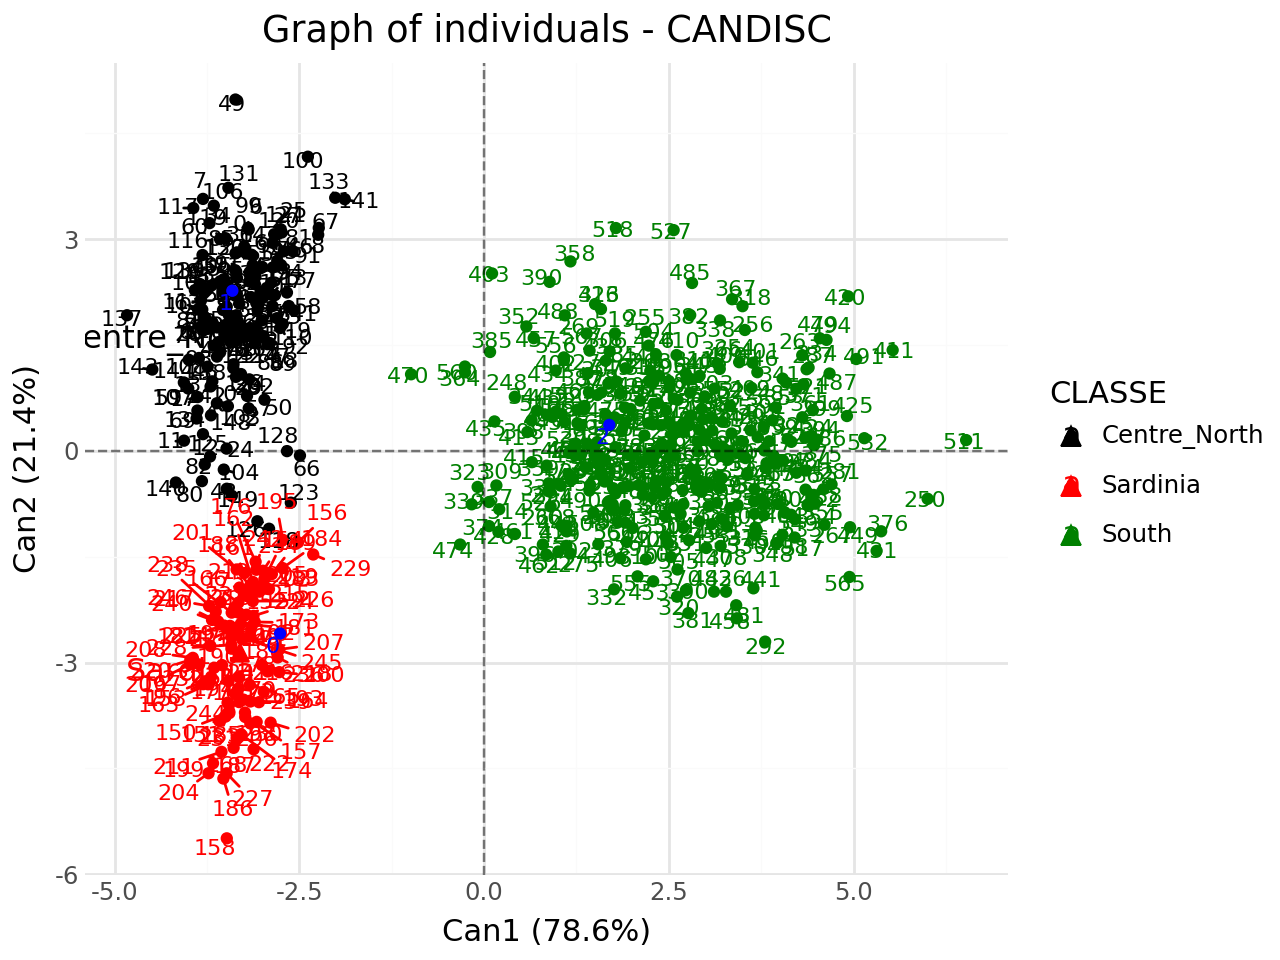

In [16]:
#with supplementary individuals
from discrimintools import add_scatter
p = add_scatter(p,clf.transform(XTest),color="blue",repel=True)
p.show()

#### Graph of variables

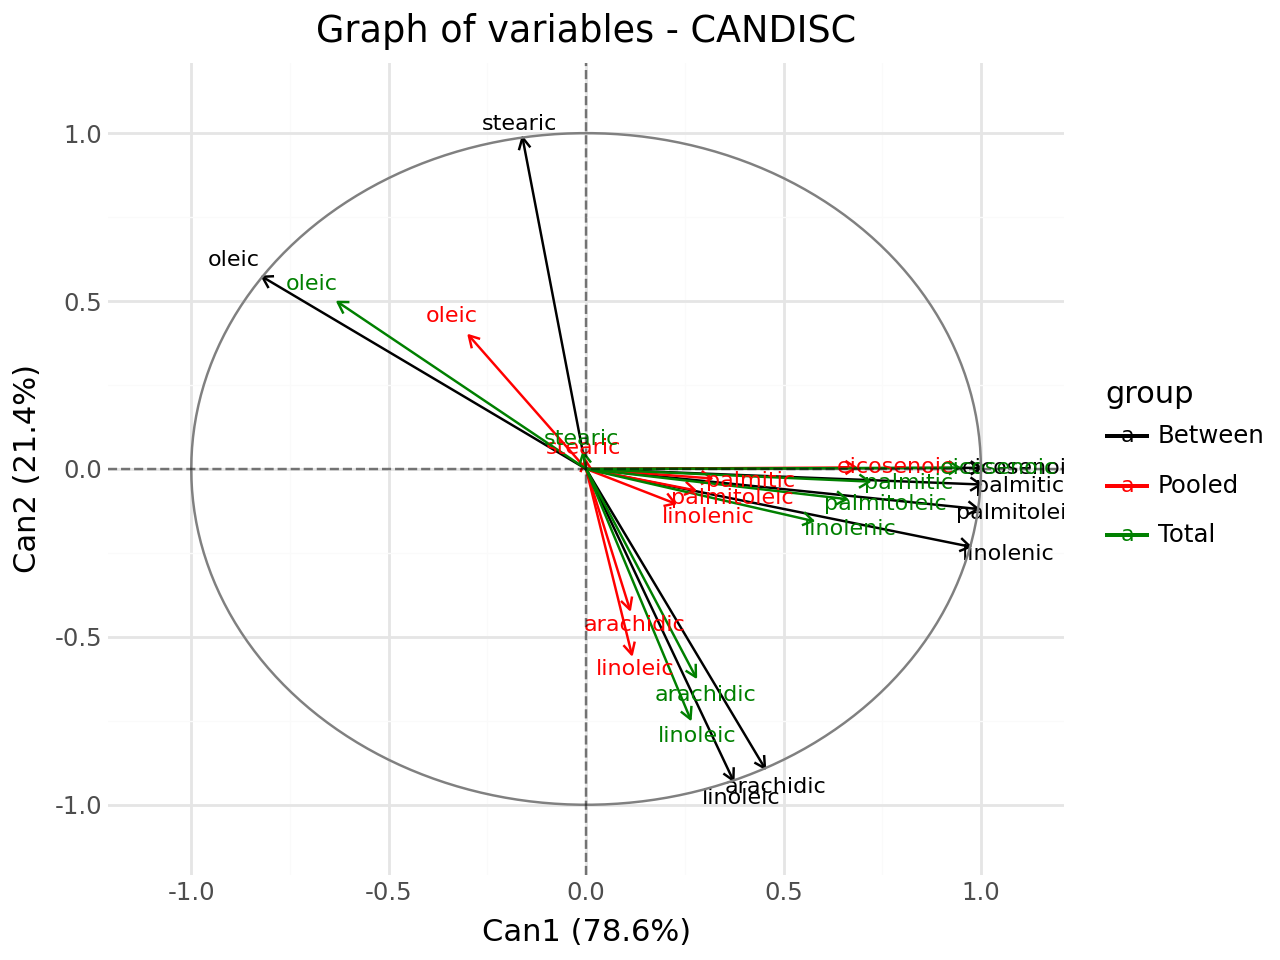

In [17]:
#graph of variables
fviz_candisc(clf,element="var",repel=True).show()

#### Biplot of individuals and variables

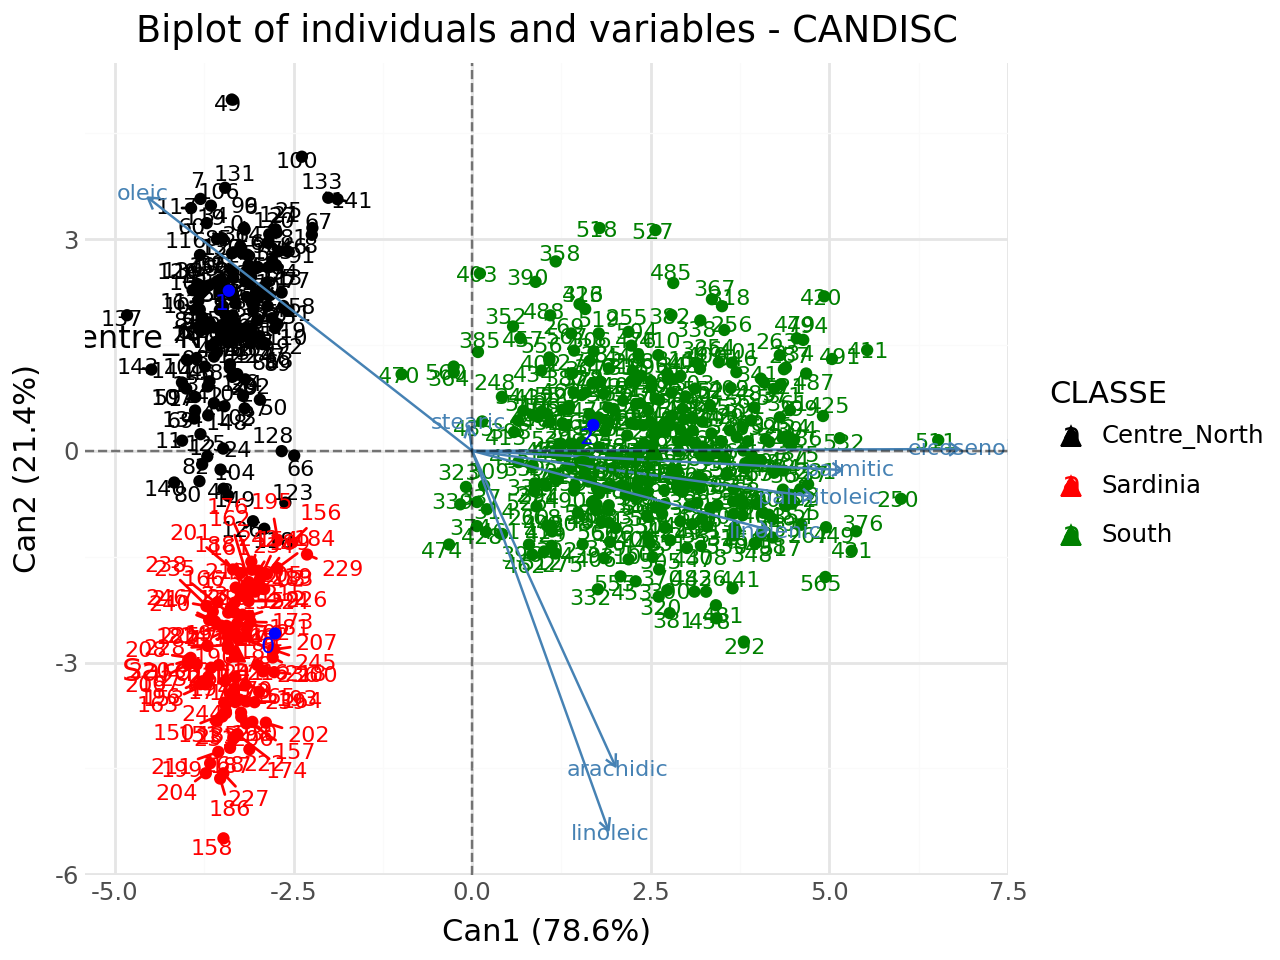

In [18]:
#biplot of individuals and variables
p = fviz_candisc(clf,element="biplot",repel=True)
#add supplementary individuals
p = add_scatter(p,clf.transform(XTest),color="blue",repel=True)
p.show()

#### Distance between barycenter

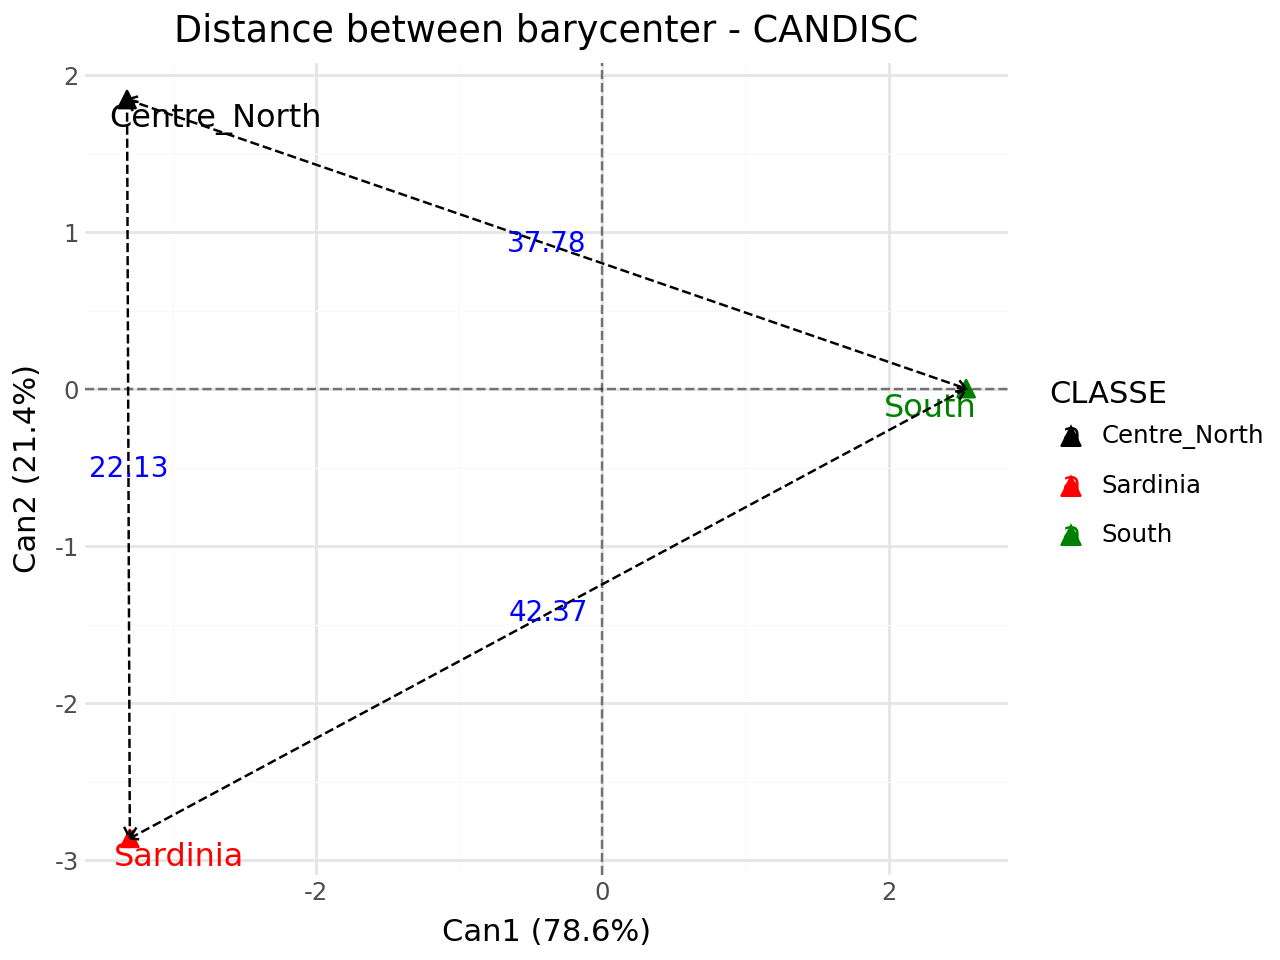

In [19]:
#distance between barycenter
fviz_candisc(clf,element="dist",repel=True).show()